# Task for session2_cont and session3:
## Edge-Preserving Denoising Filters & Feature Matching

**Instructions:**  
**please dont use .py to solve this task, just use tasks2.ipynb and edit the cells.**
- After forking the [SkyXperts-Vision-Course repo](https://github.com/ffathy-tdx/SkyXperts-Vision-Course) on GitHub. (you should have already dont this in the last session & uploaded task1)
- Go to your fork of the repo on GitHub.
- At the top, look for a yellow box that says “This branch is X commits behind…”
- Click the Sync fork or Update branch button.
The new task will show up in your tasks/ folder.  
- Upload your task to your forked repo (like you've done with task1 before)
---

## 1. DoG, LoG, and Edge-Preserving Denoising Filters

**Task:**
- Briefly read the descriptions below, then apply each filter to `'sample.jpg'` (or any test image you choose).
- Compare the results visually and write your observations.

**Background:**
- **DoG (Difference of Gaussian):** Used for edge detection by subtracting two blurred versions of the image (with different Gaussian sigmas).
- **LoG (Laplacian of Gaussian):** Uses a single Gaussian blur followed by Laplacian to highlight regions of rapid intensity change (edges).
- **Edge-Preserving Denoising (Bilateral Filter):** Smooths image while preserving edges (unlike simple Gaussian blur). You've already used this at the end of task1.

---

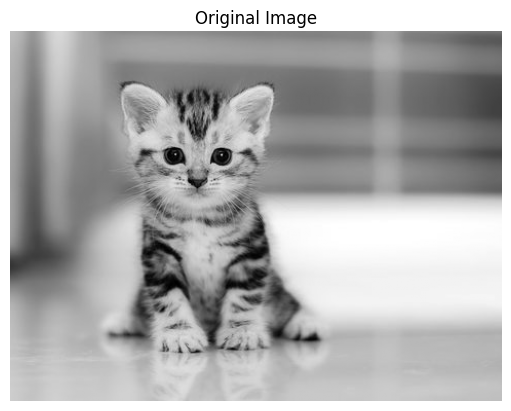

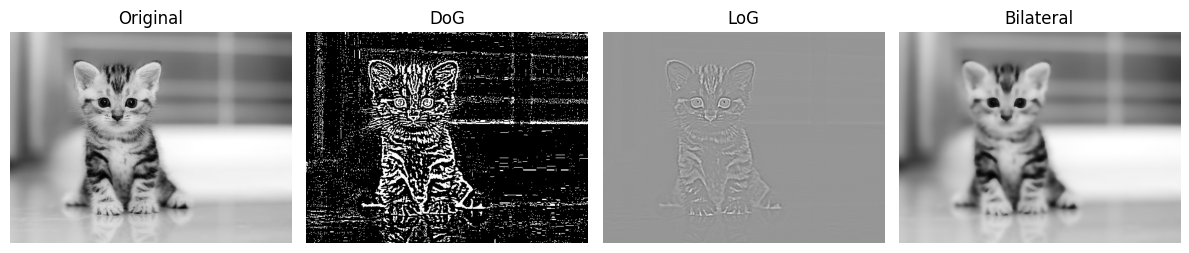

In [8]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(r'/content/cutekitten.jpg', 0)  # Use grayscale for filtering
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()

# Gaussian smoothing
blur = cv2.GaussianBlur(img, (5,5), 1)

# Laplacian of Gaussian (LoG)
log = cv2.Laplacian(blur, cv2.CV_64F)

# Difference of Gaussians (DoG)
blur1 = cv2.GaussianBlur(img, (5,5), 1)
blur2 = cv2.GaussianBlur(img, (5,5), 2)
dog = blur1 - blur2

#bilateral filter
bilateral= cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)



# --- Display Results ---
titles = ['Original', 'DoG', 'LoG', 'Bilateral']
images = [img, dog, log, bilateral]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Q1: What differences do you observe between DoG, LoG, and the edge-preserving filter?**

_Write your observations here._


In [ ]:
#Bilateral Filter:Preserves edges as it's not for edge detection while reducing noise
#log:Applies Laplacian (2nd derivative) after Gaussian smoothing, noise senstivity is high due to 2nd derrivative
#DoG:Subtracts two Gaussian-blurred images with different sigmas,Detects edges as intensity changes, mederate noise sensitivity


## 2. Keypoints & Descriptors: SIFT vs. ORB

**Task:**
- Detect and plot keypoints on `'sample.jpg'` using SIFT and ORB.
- Compare the number and distribution of detected keypoints.

**Background:**
- **Keypoints:** Distinctive image points (corners/blobs) useful for matching.
- **Descriptors:** Vectors that describe local patches around keypoints for comparison/matching.

---

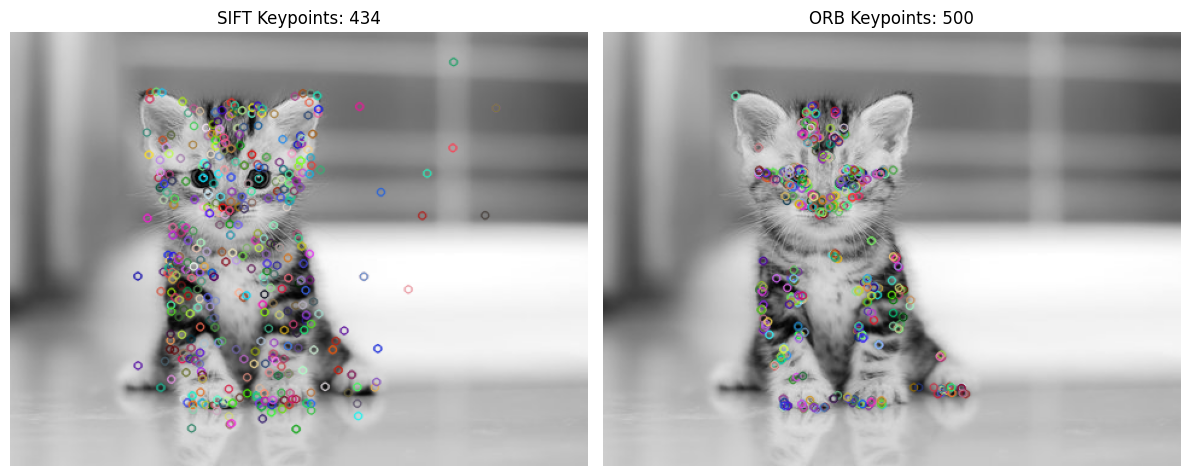

In [12]:
import cv2
import matplotlib.pyplot as plt

# --- SIFT Keypoints ---
sift = cv2.SIFT_create()
kp_sift, des_sift = sift.detectAndCompute(img, None)
img_sift = cv2.drawKeypoints(img, kp_sift, None)

# --- ORB Keypoints ---
orb = cv2.ORB_create()
kp_orb, des_orb = orb.detectAndCompute(img, None)
img_orb = cv2.drawKeypoints(img, kp_orb, None, )

# --- Display Results ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_sift, cmap='gray')
plt.title(f'SIFT Keypoints: {len(kp_sift)}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_orb, cmap='gray')
plt.title(f'ORB Keypoints: {len(kp_orb)}')
plt.axis('off')

plt.tight_layout()
plt.show()

# TODO: Count and compare number of keypoints for SIFT and ORB

**Q2: How do the number and distribution of keypoints differ between SIFT and ORB?**

_Write your answer here._

In [ ]:
#SIFT detects keypoints with better coverage across textured areas
#ORB detects keypoints, mostly around corners and edges....it's faster than the SIFT

## 3. Feature Matching with Descriptors

**Task:**
- Load a second image (e.g., `'sample2.jpg'`).
- Detect keypoints/descriptors using SIFT or ORB in both images.
- Match the features between the images using BFMatcher or FLANN.
- Plot the top matches.

**Background:**
- **Feature matching** helps recognize objects/scenes or estimate image transformations.

---

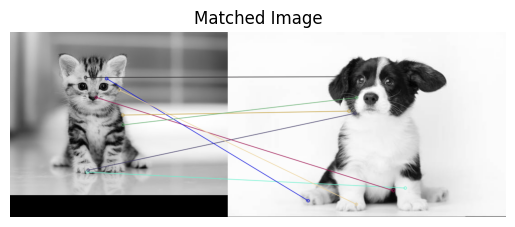

In [19]:
import cv2
# Load second image
img2 = cv2.imread(r'/content/cute puppy.jpg', 0)


sift = cv2.SIFT_create()

# Detect SIFT keypoints/descriptors in both images
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test (Lowe's ratio)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
matched_img = cv2.drawMatches(img, kp1, img2, kp2, good_matches, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Matched Image')
plt.axis('off')
plt.show()

# bonus TODO: Try with ORB or FLANN if you like

**Q3: What do you notice about the feature matches? Are there any mismatches or errors? How might you improve the matching process?**

_Write your answer here._

In [ ]:
#there is some mismatches so it's not really accurate
#Cross-checking with BFMatcher: Enable crossCheck=True to ensure matches are mutual


**Bonus Task (Optional, for extra credit):**
- Try using different image preprocessing steps *before* edge detection or feature extraction.
    - For example:
        - Add noise to your image (e.g., Gaussian noise, salt-and-pepper noise).
        - Apply a sharpening filter to your image.
    - Then, run DoG, LoG, or any edge-preserving filter and observe the changes.
- **What to do:**
    - Show the results (images/plots) for at least one type of preprocessing + edge detection.
    - Briefly explain:
        - How does noise affect edge maps or keypoints?
        - Does sharpening make features easier or harder to detect/match?

**You can add your code and observations in the cells below.**


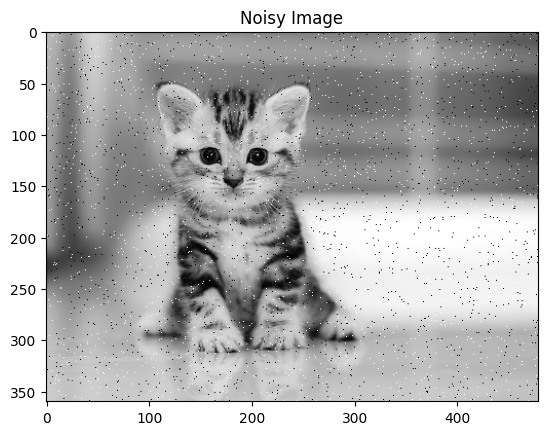

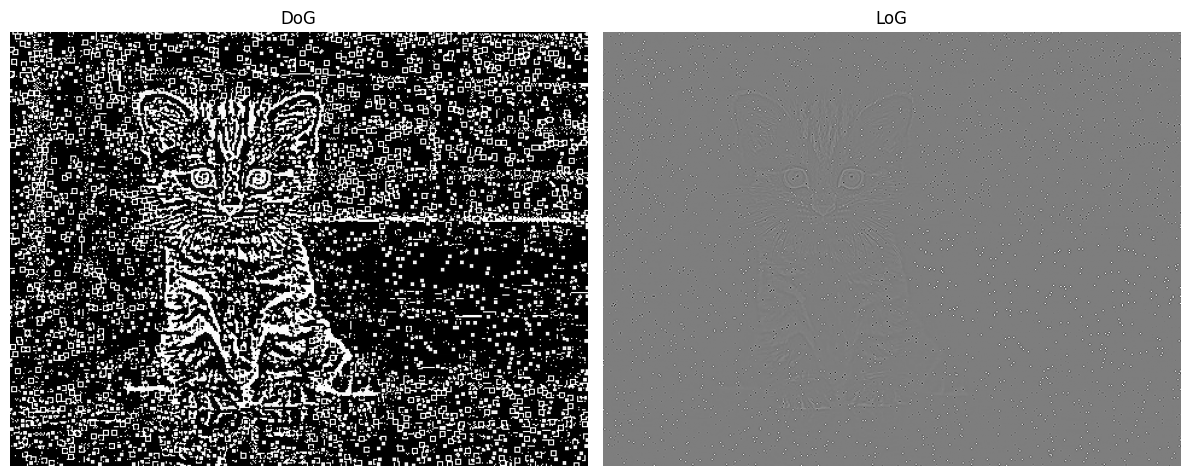

In [23]:
from skimage.util import random_noise
noisyImg = random_noise(img, mode="s&p",amount=0.02)
noisyImg = np.array(255*noisyImg, dtype="uint8")
plt.figure(), plt.imshow(noisyImg, cmap="gray", vmin=0, vmax=255), plt.title('Noisy Image')

# Laplacian of Gaussian (LoG)
log = cv2.Laplacian(noisyImg, cv2.CV_64F)

# Difference of Gaussians (DoG)
blur1 = cv2.GaussianBlur(noisyImg, (5,5), 1)
blur2 = cv2.GaussianBlur(noisyImg, (5,5), 2)
dog = blur1 - blur2

# --- Display Results ---
titles = ['DoG', 'LoG']
images = [dog, log]

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

_What are your observations?_
write them here

In [ ]:
#both did edge detecting but for the log the noise 2a2al

## 4. Reflection (Optional)

- What was the most challenging or interesting part of this task for you?
- Any feedback or thoughts?

_Write your reflection here._

In [ ]:
#the challenging one to me was the orb and the sift 3shan when I searched to understand more the difference between them, the answer is usually en el keypoints
#bta3t el SIFT btb2a aktr bas el 3aks 7asaly
